In [7]:
import numpy as np
import pandas as pd
import pynapple as nap
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter, rotate
from spatial_manifolds.data.binning import get_bin_config
from spatial_manifolds.data.loading import load_session
import warnings
import spikeinterface.full as si
import os 
warnings.filterwarnings('ignore')
from probeinterface.plotting import plot_probegroup

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
def remove_all_from_ax(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.tick_params(left=True, bottom=False)
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_yticklabels(['0', '', '1', '', '2','','3'])
    ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000])
    ax.set_ylabel('')


    return ax

def plot_NP2_probe(ax):
    project_path = "/Volumes/cmvm/sbms/groups/CDBS_SIDB_storage/NolanLab/ActiveProjects/Chris/Cohort12/derivatives/"
    # get any sorting analyzer from this project folder
    example_day_path = [f.path for f in os.scandir(f"{project_path}{'M25'}/") if f.is_dir()][25]
    sorting_analyzer_path = f"{example_day_path}/full/kilosort4/kilosort4_sa"
    sorting_analyzer = si.load_sorting_analyzer(sorting_analyzer_path, load_extensions=False)
    probe_group = sorting_analyzer.get_probegroup()
    plot_probegroup(probe_group, ax=ax, 
                    probe_shape_kwargs={"alpha":0.5,
                                        "color":"lightgrey"}, 
                    contacts_kargs={"alpha":0.0})
    ax.set_xlim(-200, 1000)
    ax.set_ylim(-300, 3000)
    ax = remove_all_from_ax(ax)

In [9]:
mouse = 25
day = 19
session_type = 'VR'
sorter = 'kilosort4'
storage = Path('/Users/harryclark/Downloads/COHORT12_nolfp/')
alpha = 0.001
n_jobs = 8
n_shuffles = 100
seed = 1

class Args:
    def __init__(self,mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed):
        self.mouse = mouse
        self.day = day
        self.session_type = session_type
        self.sorter = sorter
        self.storage = storage
        self.alpha = alpha
        self.n_jobs = n_jobs
        self.n_shuffles = n_shuffles
        self.seed = seed
args = Args(mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed)

if session_type == 'VR':
    tl = 200
elif session_type == 'MCVR':
    tl = 230
bin_config = get_bin_config(session_type)['P']



In [10]:
# Load session
session, session_path, neurons = load_session(args)
tuning_scores = {
    path.with_suffix('').name: pd.read_parquet(path)
    for path in (session_path / 'tuning_scores').iterdir()
}

71    945.0
Name: coord_probe_y, dtype: float64
79    1035.0
Name: coord_probe_y, dtype: float64
90    1170.0
Name: coord_probe_y, dtype: float64
94    1230.0
Name: coord_probe_y, dtype: float64
96    1260.0
Name: coord_probe_y, dtype: float64
97    1230.0
Name: coord_probe_y, dtype: float64
102    1260.0
Name: coord_probe_y, dtype: float64
106    1335.0
Name: coord_probe_y, dtype: float64
114    1395.0
Name: coord_probe_y, dtype: float64
115    1380.0
Name: coord_probe_y, dtype: float64
116    1410.0
Name: coord_probe_y, dtype: float64
118    1440.0
Name: coord_probe_y, dtype: float64
122    1530.0
Name: coord_probe_y, dtype: float64
125    1545.0
Name: coord_probe_y, dtype: float64
128    1530.0
Name: coord_probe_y, dtype: float64
131    1530.0
Name: coord_probe_y, dtype: float64
134    1560.0
Name: coord_probe_y, dtype: float64
135    1560.0
Name: coord_probe_y, dtype: float64
137    1590.0
Name: coord_probe_y, dtype: float64
142    1590.0
Name: coord_probe_y, dtype: float64
143    

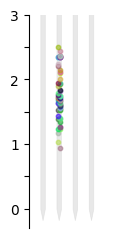

In [19]:

import random
fig, ax = plt.subplots(figsize=(1,3))
plot_NP2_probe(ax)
neurons = neurons[neurons.coord_probe_y.values > 500]
number_of_colors = len(neurons)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

for i,index in enumerate(neurons.index):
    neuron = neurons[neurons.index == index]
    ax.scatter(neuron.coord_probe_x.values, 
               neuron.coord_probe_y.values, s=10, marker='o',alpha=0.6, color=colors[i])
    print(neuron.coord_probe_y)
plt.show()
fig.savefig('/Users/harryclark/Downloads/M25_D19_neuron_locs.pdf', dpi=300)